# Neural Network Architecture

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
original = pd.read_csv("diabetes/diabetic_data_original.csv")
original[original["discharge_disposition_id"]==10]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
487,4211154,86797872,Caucasian,Female,[70-80),?,6,10,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
1027,7735086,48070035,Hispanic,Female,[70-80),?,6,10,7,8,...,No,No,No,No,No,No,No,No,Yes,NO
1101,8038050,46590138,Caucasian,Male,[60-70),?,6,10,1,8,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1585,10741320,54373995,Caucasian,Female,[90-100),?,6,10,7,5,...,No,No,No,No,No,No,No,No,No,NO
1636,10987152,72268029,Caucasian,Female,[80-90),?,6,10,1,3,...,No,No,No,No,No,No,No,No,Yes,>30
1983,12839190,66062943,Caucasian,Male,[50-60),?,6,10,1,4,...,No,No,No,No,No,No,No,No,Yes,>30


In [3]:
original.info()
#Hence, no need to handle nul value because there isn't any.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [4]:
# num_attrib=()
all_col=original.columns.values
num_col=original._get_numeric_data().columns.values

In [5]:
text_col=np.setdiff1d(all_col, num_col)

In [6]:
original= original.replace({'?': np.nan}, regex=False)
original.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
###Process Nan values
###Encounter number is chronological for each patient, so that can arrange each patient 
data = original.drop(["weight", "payer_code"], axis=1)
# #Fill in the NaN values in column "medical_specialty" with "missing" to indicate missing values
data["medical_specialty"].fillna("missing", inplace=True)
# new_balanced_data["race"].fillna("missing", inplace=True)
data.sort_values(by=["patient_nbr", "encounter_id"], inplace=True)
data.head(20)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4267,24437208,135,Caucasian,Female,[50-60),2,1,1,8,Cardiology,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
4780,26264286,135,Caucasian,Female,[50-60),1,1,7,3,Surgery-Cardiovascular/Thoracic,...,No,No,No,No,No,No,No,Ch,Yes,>30
5827,29758806,378,Caucasian,Female,[50-60),3,1,1,2,Surgery-Neuro,...,No,No,No,No,No,No,No,No,No,NO
67608,189899286,729,Caucasian,Female,[80-90),1,3,7,4,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
17494,64331490,774,Caucasian,Female,[80-90),1,1,7,3,InternalMedicine,...,No,No,No,No,No,No,No,Ch,Yes,NO
2270,14824206,927,AfricanAmerican,Female,[30-40),1,1,7,5,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
1164,8380170,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,No,Steady,No,No,No,No,No,No,Yes,>30
5953,30180318,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,No,Down,No,No,No,No,No,Ch,Yes,>30
14180,55533660,1152,AfricanAmerican,Female,[60-70),1,1,7,10,Hematology/Oncology,...,No,Steady,No,No,No,No,No,No,Yes,>30
23623,80742510,1152,AfricanAmerican,Female,[60-70),1,1,7,8,missing,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [8]:
len(data["patient_nbr"].unique())

71518

In [9]:
##Delete the rows that have "NO" for readmitted 
pn_df = data.groupby("patient_nbr").count()
# pn_df["encounter_id"].value_counts()
single_ent=pn_df[pn_df["encounter_id"]<=1]
single_ent_pats = data.loc[data["patient_nbr"].isin(single_ent.index)]
print("Number of patients with only single encounter:", single_ent_pats["patient_nbr"])

#Final_pats_index: patients with more than one encounter
final_pats_index = np.setdiff1d(data["patient_nbr"].values, single_ent_pats["patient_nbr"].values)

final_pats = data.loc[data["patient_nbr"].isin(final_pats_index)]
final_pats.reset_index(inplace=True)
final_pats.drop(columns=["index"], inplace=True)
next_time_in_hospital=[]
final_pat_index=[]
for i in final_pats.index.values:
    if i < 47020:
        if final_pats.loc[i]["patient_nbr"] == final_pats.loc[i+1]["patient_nbr"]:
            next_time_in_hospital.append(final_pats.iloc[i+1]["time_in_hospital"])
            final_pat_index.append(i)
final_pats = final_pats.loc[final_pat_index]
final_pats["next_time_in_hospital"] = next_time_in_hospital
final_pats

Number of patients with only single encounter: 5827            378
67608           729
17494           774
2270            927
18234          1305
            ...    
99863     189351095
95282     189365864
93651     189445127
101748    189481478
96147     189502619
Name: patient_nbr, Length: 54745, dtype: int64


/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
0,24437208,135,Caucasian,Female,[50-60),2,1,1,8,Cardiology,...,Steady,No,No,No,No,No,Ch,Yes,<30,3
2,8380170,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,Steady,No,No,No,No,No,No,Yes,>30,6
3,30180318,1152,AfricanAmerican,Female,[50-60),1,1,7,6,Hematology/Oncology,...,Down,No,No,No,No,No,Ch,Yes,>30,10
4,55533660,1152,AfricanAmerican,Female,[60-70),1,1,7,10,Hematology/Oncology,...,Steady,No,No,No,No,No,No,Yes,>30,8
5,80742510,1152,AfricanAmerican,Female,[60-70),1,1,7,8,missing,...,Steady,No,No,No,No,No,No,Yes,>30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47011,372665912,188238020,Caucasian,Female,[80-90),1,6,7,3,missing,...,Down,No,No,No,No,No,Ch,Yes,NO,3
47013,344902604,188284883,Other,Female,[80-90),1,1,7,1,missing,...,Steady,No,No,No,No,No,Ch,Yes,>30,2
47015,364338650,188634893,Caucasian,Male,[70-80),3,1,1,4,InternalMedicine,...,Steady,No,No,No,No,No,No,Yes,>30,2
47017,330256946,188970179,Asian,Female,[70-80),1,6,7,4,missing,...,Steady,No,No,No,No,No,Ch,Yes,<30,6


In [11]:
final_pats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30248 entries, 0 to 47019
Data columns (total 49 columns):
encounter_id                30248 non-null int64
patient_nbr                 30248 non-null int64
race                        29853 non-null object
gender                      30248 non-null object
age                         30248 non-null object
admission_type_id           30248 non-null int64
discharge_disposition_id    30248 non-null int64
admission_source_id         30248 non-null int64
time_in_hospital            30248 non-null int64
medical_specialty           30248 non-null object
num_lab_procedures          30248 non-null int64
num_procedures              30248 non-null int64
num_medications             30248 non-null int64
number_outpatient           30248 non-null int64
number_emergency            30248 non-null int64
number_inpatient            30248 non-null int64
diag_1                      30244 non-null object
diag_2                      30180 non-null object
dia

In [12]:
# Integer number of days between admission and discharge
final_data = final_pats.drop(["encounter_id", "patient_nbr"], axis=1)
final_data["race"].fillna("missing", inplace=True)
final_data.dropna(inplace=True)
final_data.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

## Bar graphs to explore the relation between X and y

In [284]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

[0-40)
[40-50)
[50-60)
[60-70)
[70-80)
[80-100)


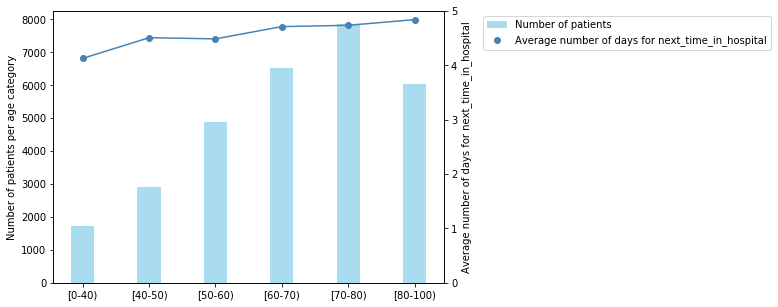

In [291]:
## investigate age-next_time_in_hospital
ave_ntih_ls = []
age_ls = []
fig,ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()
for age in np.unique(final_data['age']):
    print(age)
    i = np.where(final_data['age'] == age)
    ave_ntih = np.sum(final_data.iloc[i]['next_time_in_hospital'])/np.array(i).size
    ave_ntih_ls.append(ave_ntih)
    age_ls.append(age)
    #plot bar against total number of people
    #plot line based on ave days of hospital stay for that age cat
    plt2,=ax2.plot(age, ave_ntih, 'o', color='steelblue')
    plt1,=ax1.bar(age, np.array(i).size,width=0.35, alpha=0.7, color='skyblue')


plt.xlabel("Age")
ax1.set_ylabel("Number of patients per age category")
ax2.set_ylabel("Average number of days for next_time_in_hospital")
ax2.plot(age_ls, ave_ntih_ls,'-', color='steelblue')
ax2.set_ylim(0,5)
plt.legend([plt1, plt2],["Number of patients", "Average number of days for next_time_in_hospital"], loc='upper right', bbox_to_anchor=(1.85, 1))
plt.show

plt.savefig('./figs/ave-ntih-inc-trd.png', bbox_inches='tight')

In [302]:
from scipy.optimize import curve_fit

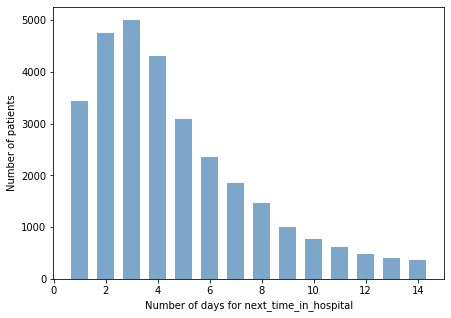

In [352]:
## graph for next_time_in_hos
y = final_df["next_time_in_hospital"].values
fig,ax = plt.subplots(figsize=(7,5))
sizes = []
for t in np.unique(y):
    i = np.where(final_data['next_time_in_hospital'] == t)
    ax.bar(t, np.array(i).size, width=0.65, alpha=0.7, color='steelblue')
    sizes.append(np.array(i).size)
    
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
plt.ylabel("Number of patients")
plt.xlabel("Number of days for next_time_in_hospital")
plt.show
plt.savefig('./figs/next_t.png', bbox_inches='tight')
##A continuous distribution skewed to the left

<30
>30
NO


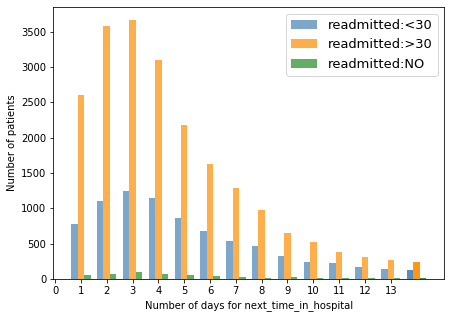

In [355]:
##relation between readmitted and number of days for y
## graph for next_time_in_hos
y = final_df["next_time_in_hospital"].values
fig,ax = plt.subplots(figsize=(7,5))
sizes = []
cmap = matplotlib.cm.get_cmap('jet') 
cdict={
    "<30":'steelblue',
    ">30": 'darkorange',
    "NO":'forestgreen'
}
width=0.25
for rd in np.unique(final_data['readmitted']):
    print(rd)

pos = -width
for rd in np.unique(final_data['readmitted']): 
    for t in np.unique(y):
        i = np.where((final_data['next_time_in_hospital'] == t) & (final_data['readmitted'] == rd))
        if t == 14:
            ax.bar(t+pos,np.array(i).size,  label=("readmitted:"+rd), width=width, alpha=0.7, color=[cdict[rd]])
        ax.bar(t+pos, np.array(i).size, width=width, alpha=0.7, color=[cdict[rd]])
    pos = pos+width
        
# plt.plot(rd_ls, ave_ntih_ls,'-', color='darkorange')
# plt.ylim(0, 7)
plt.ylabel("Number of patients")
plt.xlabel("Number of days for next_time_in_hospital")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=13)
plt.xticks(np.arange(14))
plt.show
plt.savefig('./figs/next_t_vs_rd.png', bbox_inches='tight')
##A continuous distribution skewed to the left

### plot numeric data

In [374]:
final_num_attr = ['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
num_df = final_data[final_num_attr]
num_df

,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,8,6,33,0,0,0,8
3,6,4,15,0,0,2,6
4,10,2,19,0,0,1,9
7,2,5,13,0,0,0,9
8,1,5,12,0,0,1,7
...,...,...,...,...,...,...,...
47011,3,0,18,0,0,1,9
47013,1,2,9,0,0,0,5
47015,4,0,11,0,0,0,9
47017,4,1,25,0,0,1,9


/Users/jennazhou/miniconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

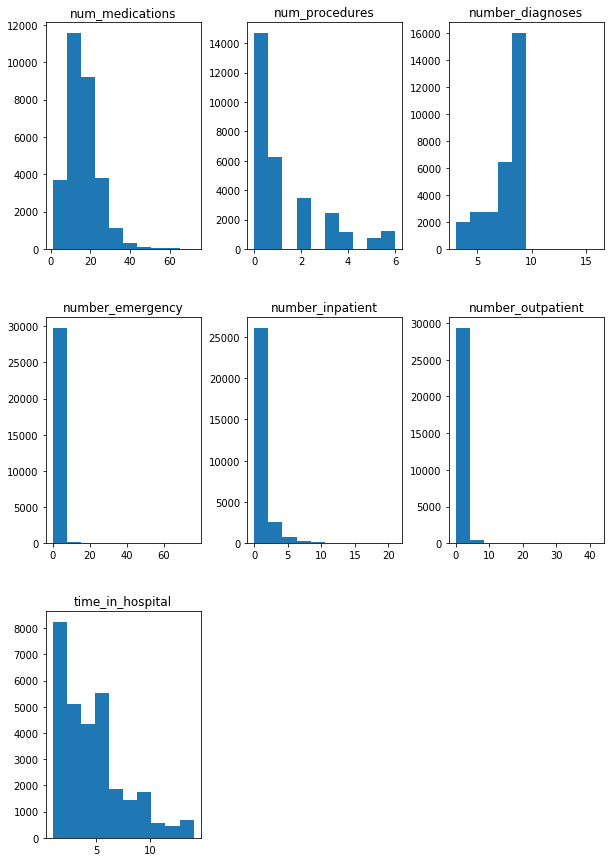

In [384]:
# plot histogram for the num attribs
fig = plt.figure(figsize = (10,15))
ax = fig.gca() #gca = get current axes
subplot = num_df.hist(ax=ax, grid=False, layout=(3,3))
subplot
ax.set_xlabel("Number of patients")
plt.savefig('./figs/num_hist.png', bbox_inches='tight')
plt.show

## Start pre-processing the dataset like before:


In [13]:
final_data.groupby("race").count()
#Combine Asian, Hispanic and Other because too few samples in Asian and Hispanic
final_data.replace("Asian", "Other", inplace=True)
final_data.replace("Hispanic", "Other", inplace=True)
final_data.groupby("race").count()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
race,,,,,,,,,,,,,,,,,,,,,
AfricanAmerican,6224,6224,6224,6224,6224,6224,6224,6224,6224,6224,...,6224,6224,6224,6224,6224,6224,6224,6224,6224,6224
Caucasian,22346,22346,22346,22346,22346,22346,22346,22346,22346,22346,...,22346,22346,22346,22346,22346,22346,22346,22346,22346,22346
Other,981,981,981,981,981,981,981,981,981,981,...,981,981,981,981,981,981,981,981,981,981
missing,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,385,385,385,385,385,385


In [14]:
final_data.groupby("age").count()
#Combine age categories below 40 to [0-40) because too few samples in each case
#Same for categories above 80
final_data.replace("[0-10)", "[0-40)", inplace=True)
final_data.replace("[10-20)", "[0-40)", inplace=True)
final_data.replace("[20-30)", "[0-40)", inplace=True)
final_data.replace("[30-40)", "[0-40)", inplace=True)
final_data.replace("[80-90)", "[80-100)", inplace=True)
final_data.replace("[90-100)", "[80-100)", inplace=True)
final_data.groupby("age").count()

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
age,,,,,,,,,,,,,,,,,,,,,
[0-40),1723,1723,1723,1723,1723,1723,1723,1723,1723,1723,...,1723,1723,1723,1723,1723,1723,1723,1723,1723,1723
[40-50),2897,2897,2897,2897,2897,2897,2897,2897,2897,2897,...,2897,2897,2897,2897,2897,2897,2897,2897,2897,2897
[50-60),4875,4875,4875,4875,4875,4875,4875,4875,4875,4875,...,4875,4875,4875,4875,4875,4875,4875,4875,4875,4875
[60-70),6532,6532,6532,6532,6532,6532,6532,6532,6532,6532,...,6532,6532,6532,6532,6532,6532,6532,6532,6532,6532
[70-80),7865,7865,7865,7865,7865,7865,7865,7865,7865,7865,...,7865,7865,7865,7865,7865,7865,7865,7865,7865,7865
[80-100),6044,6044,6044,6044,6044,6044,6044,6044,6044,6044,...,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044


In [15]:
#Group 4,5 and 8 together to form "Otherwise"
#Now, 4 is mapped to "Otherwise"
final_data["admission_type_id"].replace(5, 4, inplace=True)
final_data["admission_type_id"].replace(6, 4, inplace=True)
final_data["admission_type_id"].replace(7, 4, inplace=True)
final_data["admission_type_id"].replace(8, 4, inplace=True)

final_data.groupby("admission_type_id").count()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
admission_type_id,,,,,,,,,,,,,,,,,,,,,
1,16630,16630,16630,16630,16630,16630,16630,16630,16630,16630,...,16630,16630,16630,16630,16630,16630,16630,16630,16630,16630
2,5408,5408,5408,5408,5408,5408,5408,5408,5408,5408,...,5408,5408,5408,5408,5408,5408,5408,5408,5408,5408
3,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981,...,4981,4981,4981,4981,4981,4981,4981,4981,4981,4981
4,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917,...,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917


In [17]:
final_data.groupby("discharge_disposition_id").count()
# Combine the categories with small values into "Otherwise" (int 26)
final_data["discharge_disposition_id"].replace(4, 26, inplace=True)
final_data["discharge_disposition_id"].replace(7, 26, inplace=True)
final_data["discharge_disposition_id"].replace(8, 26, inplace=True)
final_data["discharge_disposition_id"].replace(9, 26, inplace=True)
final_data["discharge_disposition_id"].replace(11, 26, inplace=True)
final_data["discharge_disposition_id"].replace(12, 26, inplace=True)
final_data["discharge_disposition_id"].replace(13, 26, inplace=True)
final_data["discharge_disposition_id"].replace(14, 26, inplace=True)
final_data["discharge_disposition_id"].replace(15, 26, inplace=True)
final_data["discharge_disposition_id"].replace(16, 26, inplace=True)
final_data["discharge_disposition_id"].replace(17, 26, inplace=True)
final_data["discharge_disposition_id"].replace(23, 26, inplace=True)
final_data["discharge_disposition_id"].replace(24, 26, inplace=True)
final_data["discharge_disposition_id"].replace(27, 26, inplace=True)
final_data["discharge_disposition_id"].replace(28, 26, inplace=True)


# discharge_disposition_id 
final_data.groupby("discharge_disposition_id").count()

,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
discharge_disposition_id,,,,,,,,,,,,,,,,,,,,,
1,16590,16590,16590,16590,16590,16590,16590,16590,16590,16590,...,16590,16590,16590,16590,16590,16590,16590,16590,16590,16590
2,663,663,663,663,663,663,663,663,663,663,...,663,663,663,663,663,663,663,663,663,663
3,4680,4680,4680,4680,4680,4680,4680,4680,4680,4680,...,4680,4680,4680,4680,4680,4680,4680,4680,4680,4680
5,346,346,346,346,346,346,346,346,346,346,...,346,346,346,346,346,346,346,346,346,346
6,4414,4414,4414,4414,4414,4414,4414,4414,4414,4414,...,4414,4414,4414,4414,4414,4414,4414,4414,4414,4414
18,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,...,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287
22,707,707,707,707,707,707,707,707,707,707,...,707,707,707,707,707,707,707,707,707,707
25,412,412,412,412,412,412,412,412,412,412,...,412,412,412,412,412,412,412,412,412,412
26,837,837,837,837,837,837,837,837,837,837,...,837,837,837,837,837,837,837,837,837,837


In [18]:
final_data.groupby("admission_source_id").count()
# Combine the minor categories into "Otherwise" and mapped to 21

final_data["admission_source_id"].replace(2, 21, inplace=True)
final_data["admission_source_id"].replace(3, 21, inplace=True)
final_data["admission_source_id"].replace(4, 21, inplace=True)
final_data["admission_source_id"].replace(5, 21, inplace=True)
final_data["admission_source_id"].replace(6, 21, inplace=True)
final_data["admission_source_id"].replace(8, 21, inplace=True)
final_data["admission_source_id"].replace(9, 21, inplace=True)
final_data["admission_source_id"].replace(10, 21, inplace=True)
final_data["admission_source_id"].replace(20, 21, inplace=True)
final_data["admission_source_id"].replace(22, 21, inplace=True)
final_data.groupby("admission_source_id").count()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
admission_source_id,,,,,,,,,,,,,,,,,,,,,
1,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112,...,8112,8112,8112,8112,8112,8112,8112,8112,8112,8112
7,18486,18486,18486,18486,18486,18486,18486,18486,18486,18486,...,18486,18486,18486,18486,18486,18486,18486,18486,18486,18486
17,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862,...,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862
21,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476,...,1476,1476,1476,1476,1476,1476,1476,1476,1476,1476


In [19]:
final_data.groupby("medical_specialty").count()
for name in list(final_data["medical_specialty"]):
    if name[:7] == "Surgery":
        final_data["medical_specialty"].replace(name, "Surgery", inplace=True)
final_data["medical_specialty"].replace("Obsterics&Gynecology-GynecologicOnco", "ObstetricsandGynecology", inplace=True)

kept_med_specialty = ["Cardiology", "Family/GeneralPractice", "InternalMedicine", "Nephrology", "ObstetricsandGynecology", "Orthopedics", "Orthopedics-Reconstructive", "Psychiatry", "Pulmonology", "Surgery", "Urology", "missing"]
print(len(kept_med_specialty))
for name in list(final_data["medical_specialty"]):
    if name not in kept_med_specialty: 
        final_data["medical_specialty"].replace(name, "Other", inplace=True)

print(final_data["medical_specialty"].unique().shape)
final_data.groupby("medical_specialty").count()

12
(13,)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
medical_specialty,,,,,,,,,,,,,,,,,,,,,
Cardiology,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200,...,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200
Family/GeneralPractice,2383,2383,2383,2383,2383,2383,2383,2383,2383,2383,...,2383,2383,2383,2383,2383,2383,2383,2383,2383,2383
InternalMedicine,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521,...,3521,3521,3521,3521,3521,3521,3521,3521,3521,3521
Nephrology,721,721,721,721,721,721,721,721,721,721,...,721,721,721,721,721,721,721,721,721,721
ObstetricsandGynecology,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
Orthopedics,333,333,333,333,333,333,333,333,333,333,...,333,333,333,333,333,333,333,333,333,333
Orthopedics-Reconstructive,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
Other,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294,...,4294,4294,4294,4294,4294,4294,4294,4294,4294,4294
Psychiatry,238,238,238,238,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238


In [20]:
# Based on the correlation matrix, num_lab_procedures do not contribute much to the readmission rate, hence drop it
final_data.drop(columns="num_lab_procedures", inplace=True)

In [21]:
# This part can only be run once
final_data.groupby("diag_1").count()
# Group the categories together according to the first three digits of ICD9
for icd in list(final_data["diag_1"]):
    if icd[:4] == "250.":
        final_data["diag_1"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V":
        final_data["diag_1"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        final_data["diag_1"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        final_data["diag_1"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        final_data["diag_1"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        final_data["diag_1"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        final_data["diag_1"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        final_data["diag_1"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        final_data["diag_1"].replace(icd, "Neoplasms", inplace=True)
    else:
        final_data["diag_1"].replace(icd, "Other", inplace=True)


In [22]:
亲爱滴final_data.groupby("diag_1").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_1,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056,...,9056,9056,9056,9056,9056,9056,9056,9056,9056,9056
Diabetes,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916,...,2916,2916,2916,2916,2916,2916,2916,2916,2916,2916
Digestive Disease,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853,...,2853,2853,2853,2853,2853,2853,2853,2853,2853,2853
Genitourinary Disease,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477,...,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477
Injury and poisoning,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,...,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971
Musculoskeletal Disease,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,...,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049
Neoplasms,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700
Other,5393,5393,5393,5393,5393,5393,5393,5393,5393,5393,...,5393,5393,5393,5393,5393,5393,5393,5393,5393,5393
Respiratory Disease,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,...,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521


In [23]:
# This part can only be run once
for icd in list(final_data["diag_2"]):
    if icd[:4] == "250.":
        final_data["diag_2"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V" or icd[0] == "E":
        final_data["diag_2"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        final_data["diag_2"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        final_data["diag_2"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        final_data["diag_2"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        final_data["diag_2"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        final_data["diag_2"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        final_data["diag_2"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        final_data["diag_2"].replace(icd, "Neoplasms", inplace=True)
    else:
        final_data["diag_2"].replace(icd, "Other", inplace=True)

In [24]:
final_data.groupby("diag_2").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_2,,,,,,,,,,,,,,,,,,,,,
Circulatory Disease,9569,9569,9569,9569,9569,9569,9569,9569,9569,9569,...,9569,9569,9569,9569,9569,9569,9569,9569,9569,9569
Diabetes,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,...,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
Digestive Disease,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,...,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
Genitourinary Disease,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,...,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605
Injury and poisoning,566,566,566,566,566,566,566,566,566,566,...,566,566,566,566,566,566,566,566,566,566
Musculoskeletal Disease,447,447,447,447,447,447,447,447,447,447,...,447,447,447,447,447,447,447,447,447,447
Neoplasms,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
Other,9120,9120,9120,9120,9120,9120,9120,9120,9120,9120,...,9120,9120,9120,9120,9120,9120,9120,9120,9120,9120
Respiratory Disease,3396,3396,3396,3396,3396,3396,3396,3396,3396,3396,...,3396,3396,3396,3396,3396,3396,3396,3396,3396,3396


In [25]:
# This part can only be run once
for icd in list(final_data["diag_3"]):
    if icd == "365.44":
        final_data["diag_3"].replace(icd, "Other", inplace=True)
    elif not icd.isdigit():
        continue
    elif icd[:4] == "250.":
        final_data["diag_3"].replace(icd, "Diabetes", inplace=True)
    elif icd[0] == "V" or icd[0] == "E":
        final_data["diag_3"].replace(icd, "Other", inplace=True)
    elif 390 <= int(icd) <= 459 or int(icd) == 785:
        final_data["diag_3"].replace(icd, "Circulatory Disease", inplace=True)
    elif 460 <= int(icd) <= 519 or int(icd) == 786:
        final_data["diag_3"].replace(icd, "Respiratory Disease", inplace=True)
    elif 520 <= int(icd) <= 579 or int(icd) == 787:
        final_data["diag_3"].replace(icd, "Digestive Disease", inplace=True)
    elif 800 <= int(icd) <= 999:
        final_data["diag_3"].replace(icd, "Injury and poisoning", inplace=True)
    elif 710 <= int(icd) <= 739:
        final_data["diag_3"].replace(icd, "Musculoskeletal Disease", inplace=True)
    elif 580 <= int(icd) <= 629 or int(icd) == 788:
        final_data["diag_3"].replace(icd, "Genitourinary Disease", inplace=True)
    elif 140 <= int(icd) <= 239:
        final_data["diag_3"].replace(icd, "Neoplasms", inplace=True)
    else:
        final_data["diag_3"].replace(icd, "Other", inplace=True)

final_data.groupby("diag_3").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_3,,,,,,,,,,,,,,,,,,,,,
250.01,287,287,287,287,287,287,287,287,287,287,...,287,287,287,287,287,287,287,287,287,287
250.02,481,481,481,481,481,481,481,481,481,481,...,481,481,481,481,481,481,481,481,481,481
250.03,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
250.1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
250.11,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V64,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
V65,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
V66,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [26]:
final_data.groupby("diag_3").count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,next_time_in_hospital
diag_3,,,,,,,,,,,,,,,,,,,,,
250.01,287,287,287,287,287,287,287,287,287,287,...,287,287,287,287,287,287,287,287,287,287
250.02,481,481,481,481,481,481,481,481,481,481,...,481,481,481,481,481,481,481,481,481,481
250.03,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
250.1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
250.11,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V64,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
V65,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
V66,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 47019
Data columns (total 46 columns):
race                        29936 non-null object
gender                      29936 non-null object
age                         29936 non-null object
admission_type_id           29936 non-null int64
discharge_disposition_id    29936 non-null int64
admission_source_id         29936 non-null int64
time_in_hospital            29936 non-null int64
medical_specialty           29936 non-null object
num_procedures              29936 non-null int64
num_medications             29936 non-null int64
number_outpatient           29936 non-null int64
number_emergency            29936 non-null int64
number_inpatient            29936 non-null int64
diag_1                      29936 non-null object
diag_2                      29936 non-null object
diag_3                      29936 non-null object
number_diagnoses            29936 non-null int64
max_glu_serum               29936 non-null object
A

In [28]:
#separate the numerically typed and non-numerically types columns first
from pandas.api.types import is_numeric_dtype

num_attrib = list([])
obj_attrib = list([])
for col in final_data.columns:
    if is_numeric_dtype(final_data[col]):
        num_attrib.append(col)
    else:
        obj_attrib.append(col)
print(num_attrib)
print(obj_attrib)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'next_time_in_hospital']
['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [29]:
#Some numeric values do not have numeric meaning, hence should be encoded as one-hot as well
no_numeric_meaning_attrib = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
new_obj_attrib = obj_attrib + no_numeric_meaning_attrib
new_num_attrib = [x for x in num_attrib if x not in no_numeric_meaning_attrib]
new_num_attrib
print(new_obj_attrib)
print(new_num_attrib)

['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
['time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'next_time_in_hospital']


In [31]:
# Convert datatype of values of new_obj_attrib to object
for itm in new_obj_attrib:
    final_data[itm] = final_data[itm].astype(dtype='str')
    
display(final_data["race"])
display(final_data["admission_type_id"])

0              Caucasian
3        AfricanAmerican
4        AfricanAmerican
7              Caucasian
8              Caucasian
              ...       
47011          Caucasian
47013              Other
47015          Caucasian
47017              Other
47019              Other
Name: race, Length: 29936, dtype: object

0        2
3        1
4        1
7        2
8        1
        ..
47011    1
47013    1
47015    3
47017    1
47019    1
Name: admission_type_id, Length: 29936, dtype: object

In [35]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score

In [43]:
#Set num_attrib_scaled as the base dataframe, and add others to the base dataframe 
final_df = pd.DataFrame(final_data[new_num_attrib], columns=new_num_attrib)
final_df.reset_index(drop=True, inplace=True)
final_df

,time_in_hospital,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,next_time_in_hospital
0,8,6,33,0,0,0,8,3
1,6,4,15,0,0,2,6,10
2,10,2,19,0,0,1,9,8
3,2,5,13,0,0,0,9,1
4,1,5,12,0,0,1,7,3
...,...,...,...,...,...,...,...,...
29931,3,0,18,0,0,1,9,3
29932,1,2,9,0,0,0,5,2
29933,4,0,11,0,0,0,9,2
29934,4,1,25,0,0,1,9,6


In [44]:
#Convert the remaining obj attrib to one hot encoder
encoder = LabelBinarizer()
for obj in new_obj_attrib:
    one_hot = encoder.fit_transform(final_data[obj])
    classes = list(encoder.classes_)
#     display(classes)
    if len(classes) <= 2:
        new_df = pd.DataFrame(one_hot, columns=[obj])
    else:
        attr = [obj + " " + s for s in classes]
        new_df = pd.DataFrame(one_hot, columns=attr)
    final_df = pd.concat([final_df, new_df], axis=1, sort=False)

final_df.head(10)
final_df.shape

(29936, 263)

In [49]:
#Get all data for splitting using tsne first
X= final_df.values
X.shape

(29936, 263)

In [202]:
#corr matrix
corr_matrix = final_df.corr()亲爱滴
corr_matrix["next_time_in_hospital"].sort_values(ascending=False)[:21]

next_time_in_hospital                 1.000000
time_in_hospital                      0.208488
discharge_disposition_id 22           0.088217
readmitted <30                        0.078263
discharge_disposition_id 3            0.070002
discharge_disposition_id 18           0.060872
num_medications                       0.060754
admission_source_id 21                0.052141
discharge_disposition_id 5            0.049458
diag_1 Other                          0.040625
number_diagnoses                      0.030991
age [80-100)                          0.030628
diag_1 Injury and poisoning           0.030163
race AfricanAmerican                  0.028251
medical_specialty Psychiatry          0.026489
number_inpatient                      0.025678
medical_specialty Orthopedics         0.022511
medical_specialty InternalMedicine    0.020767
discharge_disposition_id 26           0.020284
change                                0.020197
admission_type_id 2                   0.018925
Name: next_ti

## tSNE with dim=2 to select training and testing set (discarded)

In [50]:
###Split data into training set and testing set
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X)
tsne_results

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 29936 samples in 1.181s...
[t-SNE] Computed neighbors for 29936 samples in 143.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29936
[t-SNE] Computed conditional probabilities for sample 2000 / 29936
[t-SNE] Computed conditional probabilities for sample 3000 / 29936
[t-SNE] Computed conditional probabilities for sample 4000 / 29936
[t-SNE] Computed conditional probabilities for sample 5000 / 29936
[t-SNE] Computed conditional probabilities for sample 6000 / 29936
[t-SNE] Computed conditional probabilities for sample 7000 / 29936
[t-SNE] Computed conditional probabilities for sample 8000 / 29936
[t-SNE] Computed conditional probabilities for sample 9000 / 29936
[t-SNE] Computed conditional probabilities for sample 10000 / 29936
[t-SNE] Computed conditional probabilities for sample 11000 / 29936
[t-SNE] Computed conditional probabilities for sample 12000 / 29936
[t-SNE] Computed conditional probabilities for s

array([[ 35.884    , -47.628117 ],
       [ 38.79239  ,   6.27609  ],
       [ 27.998713 ,  -7.293335 ],
       ...,
       [-21.780838 ,  21.824648 ],
       [  6.2709255, -43.382797 ],
       [-21.212227 , -19.03907  ]], dtype=float32)

In [56]:
#Get the two components
cp1, cp2 = tsne_results[:,0], tsne_results[:,1]
print(cp1.shape)
print(cp2.shape)

(29936,)
(29936,)


{1: (0.0, 0.0, 0.945632798573975, 1.0), 2: (0.0, 0.09607843137254903, 1.0, 1.0), 3: (0.0, 0.3, 1.0, 1.0), 4: (0.0, 0.503921568627451, 1.0, 1.0), 5: (0.0, 0.692156862745098, 1.0, 1.0), 6: (0.0, 0.8960784313725491, 0.9709044908285895, 1.0), 7: (0.16129032258064513, 1.0, 0.8064516129032259, 1.0), 8: (0.3257432005060088, 1.0, 0.6419987349778622, 1.0), 9: (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), 10: (0.641998734977862, 1.0, 0.3257432005060089, 1.0), 11: (0.8064516129032256, 1.0, 0.16129032258064513, 1.0), 12: (0.9709044908285893, 0.9593318809005086, 0.0, 1.0), 13: (1.0, 0.7705156136528688, 0.0, 1.0), 14: (1.0, 0.5816993464052289, 0.0, 1.0)}
1
2
3
4
5
6
7
8
9
10
11
12
13
14


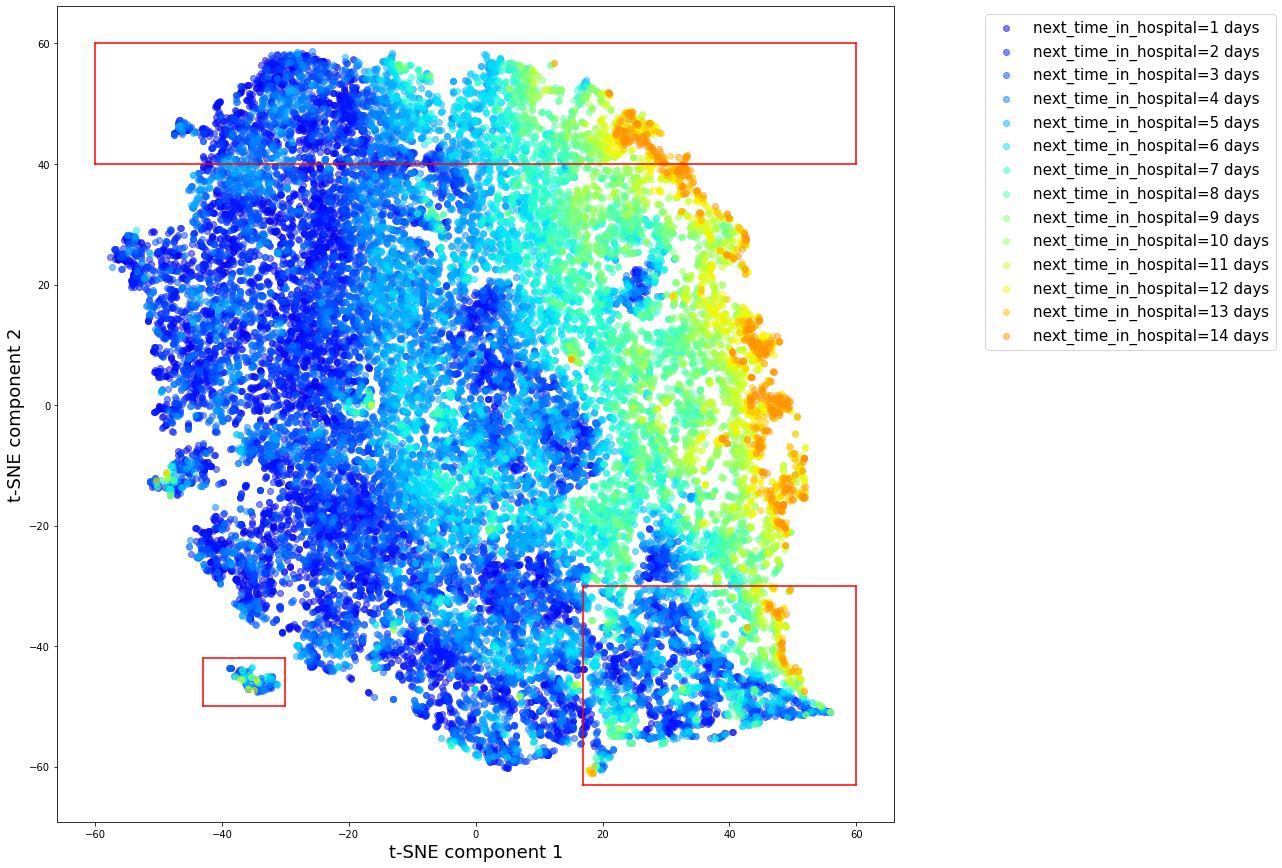

In [165]:
y = final_df["next_time_in_hospital"].values
np.unique(y)
cmap = matplotlib.cm.get_cmap('jet') # return a colored map with specific name 'jet'
cdict = {}
stp = 10
for lvl in np.unique(y):
    cdict[lvl] = cmap(stp/100)
    stp = stp+5

print(cdict)
fig,ax = plt.subplots(figsize=(15,15))
for lvl in np.unique(y):
    print(lvl)
    i = np.where(y == lvl)
    ax.scatter(cp1[i], cp2[i], label='next_time_in_hospital='+str(np.unique(y)[lvl-1])+' days', marker='o', alpha=0.5, c=[cdict[lvl]]) #c=[cdict[lvl]]
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 15})

# #Crop out one cluster for one fold if cv needed
# plt.plot([-60, 60], [30, 30], 'r-')
# plt.plot([-60, 60], [10, 10], 'r-')
# plt.plot([-60, -60], [10, 30], 'r-')
# plt.plot([60, 60], [10, 30], 'r-')

#Crop out one cluster
plt.plot([-60, 60], [60, 60], 'r-')
plt.plot([-60, 60], [40, 40], 'r-')
plt.plot([-60, -60], [40, 60], 'r-')
plt.plot([60, 60], [40, 60], 'r-')

#Crop out the second cluster
plt.plot([-43, -30], [-42, -42], 'r-')
plt.plot([-43, -30], [-50, -50], 'r-')
plt.plot([-30, -30], [-42, -50], 'r-')
plt.plot([-43, -43], [-42, -50], 'r-')


#Crop out the third cluster
plt.plot([17, 60], [-63, -63], 'r-')
plt.plot([17, 60], [-30, -30], 'r-')
plt.plot([17, 17], [-63, -30], 'r-')
plt.plot([60, 60], [-63, -30], 'r-')

plt.xlabel("t-SNE component 1", fontsize=18)
plt.ylabel("t-SNE component 2", fontsize=18)

plt.show()


In [156]:
亲爱滴 Q### Locate the two clusters in cp1 and cp2
idx = []
for i in range(cp1.shape[0]):
    if -60 < cp1[i] < 60 and 40 < cp2[i] < 60:
        idx.append(i)
    elif -43 < cp1[i] < -30 and -50 < cp2[i] < -42:
        idx.append(i)
    elif 17 < cp1[i] < 60 and -63 < cp2[i] < -30:
        idx.append(i)
        
tesize=len(idx)
print(tesize)
print(tesize/cp1.shape[0])

6254
0.20891234633885622


In [187]:
test_idx = idx
train_idx = np.setdiff1d(range(cp1.shape[0]), idx)
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(np.unique(y_test))

(23696, 263) (6240, 263)
(23696,) (6240,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


## tSNE with dim=1D to select training and testing sets

In [170]:
###TSNE with different perplexity and dimensionality
###Split data into training set and testing set
from sklearn.manifold import TSNE

tsne_1d = TSNE(n_components=1, verbose=1, perplexity=50)
tsne_1d_results = tsne_1d.fit_transform(X)
tsne_1d_results

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 29936 samples in 1.251s...
[t-SNE] Computed neighbors for 29936 samples in 152.598s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29936
[t-SNE] Computed conditional probabilities for sample 2000 / 29936
[t-SNE] Computed conditional probabilities for sample 3000 / 29936
[t-SNE] Computed conditional probabilities for sample 4000 / 29936
[t-SNE] Computed conditional probabilities for sample 5000 / 29936
[t-SNE] Computed conditional probabilities for sample 6000 / 29936
[t-SNE] Computed conditional probabilities for sample 7000 / 29936
[t-SNE] Computed conditional probabilities for sample 8000 / 29936
[t-SNE] Computed conditional probabilities for sample 9000 / 29936
[t-SNE] Computed conditional probabilities for sample 10000 / 29936
[t-SNE] Computed conditional probabilities for sample 11000 / 29936
[t-SNE] Computed conditional probabilities for sample 12000 / 29936
[t-SNE] Computed conditional probabilities for 

array([[-52.20954 ],
       [-12.53509 ],
       [-17.195505],
       ...,
       [ 15.731362],
       [-31.404867],
       [ -3.108005]], dtype=float32)

In [171]:
tsne_1d_results.shape

(29936, 1)

{1: (0.0, 0.0, 0.945632798573975, 1.0), 2: (0.0, 0.09607843137254903, 1.0, 1.0), 3: (0.0, 0.3, 1.0, 1.0), 4: (0.0, 0.503921568627451, 1.0, 1.0), 5: (0.0, 0.692156862745098, 1.0, 1.0), 6: (0.0, 0.8960784313725491, 0.9709044908285895, 1.0), 7: (0.16129032258064513, 1.0, 0.8064516129032259, 1.0), 8: (0.3257432005060088, 1.0, 0.6419987349778622, 1.0), 9: (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), 10: (0.641998734977862, 1.0, 0.3257432005060089, 1.0), 11: (0.8064516129032256, 1.0, 0.16129032258064513, 1.0), 12: (0.9709044908285893, 0.9593318809005086, 0.0, 1.0), 13: (1.0, 0.7705156136528688, 0.0, 1.0), 14: (1.0, 0.5816993464052289, 0.0, 1.0)}
1
2
3
4
5
6
7
8
9
10
11
12
13
14


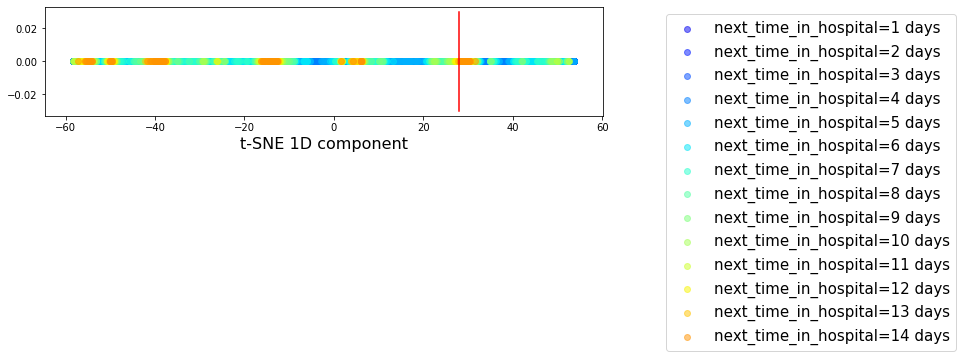

In [200]:
tdim = tsne_1d_results[:,0]

y = final_df["next_time_in_hospital"].values
np.unique(y)
cmap = matplotlib.cm.get_cmap('jet') # return a colored map with specific name 'jet'
cdict = {}
stp = 10
for lvl in np.unique(y):
    cdict[lvl] = cmap(stp/100)
    stp = stp+5

print(cdict)
fig,ax = plt.subplots(figsize=(10,2))
for lvl in np.unique(y):
    print(lvl)
    i = np.where(y == lvl)
    ax.scatter(tdim[i], np.zeros_like(tdim[i]), label='next_time_in_hospital='+str(np.unique(y)[lvl-1])+' days', marker='o', alpha=0.5, c=[cdict[lvl]]) #c=[cdict[lvl]]
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1),prop={'size': 15})

plt.xlabel("t-SNE 1D component", fontsize=16)

plt.plot([28, 28], [-0.03, 0.03], 'r-')

plt.show

plt.savefig('./figs/tSNE_split.png', bbox_inches='tight')


In [186]:
亲爱滴 Q### Locate the two clusters tdim
idx = []
for i in range(tdim.shape[0]):
    if 28 < tdim[i]:
        idx.append(i)
                 
tesize=len(idx)
print(tesize)
print(tesize/cp1.shape[0])

6240
0.2084446819882416


## NN1. Multilayer Perceptron

In [157]:
from __future__ import print_function

import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [188]:
params = {'lr': (0.8, 1.0, 3),
          'first_neuron':[32, 64, 128, 256, 512],
          'kernel_initializer': ['uniform'], #,'normal'
         }


mlp = Sequential([
              Dense(64, activation='relu', input_shape=(263,), kernel_initializer='uniform'),
              Dropout(0, seed=42),
              Dense(32, activation='relu'),
              Dropout(0, seed=42),
            #   Dense(8, activation='relu'),
            #   Dropout(Dropout(0.50, seed=42)),
              Dense(15, activation='sigmoid'),
            ])

# split a single job to multiple GPUs
# mlp = multi_gpu_model(mlp, gpus=3)

# Compile the model
mlp.compile(
  optimizer='Adam',
  loss='mean_squared_error',
   metrics=['accuracy', 'mse']
)

In [189]:
# Train the data
history = mlp.fit(
    X_train, # training data
    to_categorical(y_train), # training targets
    epochs=10, #need to manually change
    batch_size=10, #need to manually change
    verbose=1,
    validation_data=(X_test, to_categorical(y_test)))


score = mlp.evaluate(X_test, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test mse:', score[2])

Train on 23696 samples, validate on 6240 samples
Epoch 1/10
23696/23696 [==============================] - 2s 92us/step - loss: 0.0337 - accuracy: 0.6507 - mse: 0.0337 - val_loss: 0.0112 - val_accuracy: 0.8992 - val_mse: 0.0112
Epoch 2/10
23696/23696 [==============================] - 2s 82us/step - loss: 0.0080 - accuracy: 0.9183 - mse: 0.0080 - val_loss: 0.0069 - val_accuracy: 0.9204 - val_mse: 0.0069
Epoch 3/10
23696/23696 [==============================] - 2s 82us/step - loss: 0.0051 - accuracy: 0.9415 - mse: 0.0051 - val_loss: 0.0061 - val_accuracy: 0.9207 - val_mse: 0.0061
Epoch 4/10
23696/23696 [==============================] - 2s 83us/step - loss: 0.0043 - accuracy: 0.9480 - mse: 0.0043 - val_loss: 0.0052 - val_accuracy: 0.9210 - val_mse: 0.0052
Epoch 5/10
23696/23696 [==============================] - 2s 82us/step - loss: 0.0036 - accuracy: 0.9583 - mse: 0.0036 - val_loss: 0.0045 - val_accuracy: 0.9394 - val_mse: 0.0045
Epoch 6/10
23696/23696 [==============================] 

In [190]:
###PCA to reduce dimensionality
from sklearn.decomposition import PCA
n_pc = 30

pca = PCA(n_components=n_pc)
pca_tr = pca.fit_transform(X_train)
pca_te = pca.transform(X_test)

In [191]:
###New MLP with dim=PC_components
mlp = Sequential([
              Dense(64, activation='relu', input_shape=(n_pc,), kernel_initializer='uniform'),
              Dropout(0, seed=42),
              Dense(32, activation='relu'),
              Dropout(0, seed=42),
            #   Dense(8, activation='relu'),
            #   Dropout(Dropout(0.50, seed=42)),
              Dense(15, activation='sigmoid'),
            ])

# split a single job to multiple GPUs
# mlp = multi_gpu_model(mlp, gpus=3)

# Compile the model
mlp.compile(
  optimizer='Adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)



In [192]:
###Apply MLP on PCA PCs
history = mlp.fit(
    pca_tr, # training data
    to_categorical(y_train), # training targets
    epochs=10, #need to manually change
    batch_size=10, #need to manually change
    verbose=1,
    validation_data=(pca_te, to_categorical(y_test)))

score = mlp.evaluate(pca_te, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 23696 samples, validate on 6240 samples
Epoch 1/10
23696/23696 [==============================] - 2s 87us/step - loss: 0.1186 - accuracy: 0.9535 - val_loss: 0.0529 - val_accuracy: 0.9781
Epoch 2/10
23696/23696 [==============================] - 2s 79us/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0184 - val_accuracy: 0.9931
Epoch 3/10
23696/23696 [==============================] - 2s 78us/step - loss: 0.0137 - accuracy: 0.9947 - val_loss: 0.0150 - val_accuracy: 0.9951
Epoch 4/10
23696/23696 [==============================] - 2s 78us/step - loss: 0.0095 - accuracy: 0.9963 - val_loss: 0.0145 - val_accuracy: 0.9932
Epoch 5/10
23696/23696 [==============================] - 2s 78us/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.0087 - val_accuracy: 0.9964
Epoch 6/10
23696/23696 [==============================] - 2s 78us/step - loss: 0.0060 - accuracy: 0.9976 - val_loss: 0.0095 - val_accuracy: 0.9957
Epoch 7/10
23696/23696 [==============================] - 2s 78us/ste

In [ ]:
## With the same parameters for mlp, not much increase in the speed, but acc increases